# Libraries (Библиотеки)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# First data review (Первичный отсмотр данных)

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

# Выгрузка данных в DataFrame из .csv файла
df_stud_math = pd.read_csv('C:/Users/Igor/Downloads/stud_math.csv')
# Замена названия одново из столбцов для добной работы
df_stud_math.columns = ['studytime_granular' if x=='studytime, granular' else x for x in df_stud_math.columns]

display(df_stud_math.head(10))
df_stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

# Functions (Функции)

In [3]:
# Обработка числовых данных в столбце
def number_processing(col_name):
    x = df_stud_math[col_name].describe()
    df_stud_math[col_name].hist()
    return x

# Обработка строковых данных в столбце
def string_processing(col_name):
    df_stud_math[col_name] = df_stud_math[col_name].astype(str).apply(lambda x: None if x.strip() == '' else x)
    display(df_stud_math[col_name].value_counts())
    
# Вывод инфогрмаии о данных в столбце
def col_info(col_name):
    display(pd.DataFrame(df_stud_math[col_name].value_counts()))
    print("Значений, встретившихся в столбце более 10 раз:", (df_stud_math[col_name].value_counts()>10).sum())
    df_stud_math.loc[:, [col_name]].info()

# Фильтрация выбросов формулой интерквартильного расстояния (межквартильного размаха)
def iqr_calculation(col_name):
    IQR = df_stud_math[col_name].quantile(0.75) - df_stud_math[col_name].quantile(0.25)
    perc25 = df_stud_math[col_name].quantile(0.25)
    perc75 = df_stud_math[col_name].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
    df_stud_math[col_name].loc[df_stud_math[col_name].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
    plt.legend()

# Обработка числовых данных

## Работа с 'age'

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

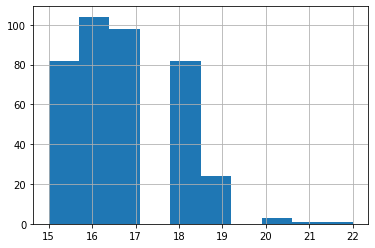

In [4]:
col_name = 'age'
number_processing(col_name)

In [5]:
col_info(col_name)

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [6]:
# Данные столбца распологаются в интервале от 15 до 22. Основная часть наблюдаемых имеет возраст от 15 до 19 лет.

## Работа с 'Medu'

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

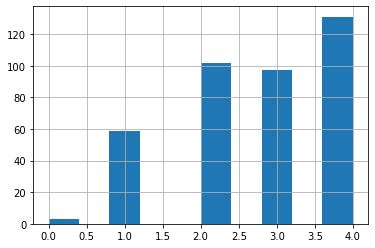

In [7]:
col_name = 'Medu'
number_processing(col_name)

In [8]:
col_info(col_name)

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [9]:
# Данные столбца находятся в рамках от 0 до 4. 
# Основная часть данных больше 0, следовательно большинство матерей имеет как минимм 4 клаcса образования.

## Работа с 'Fedu'

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

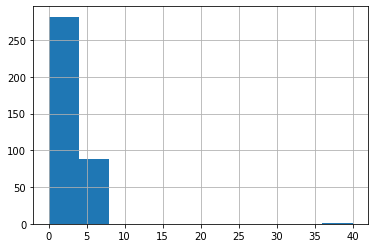

In [10]:
col_name = 'Fedu'
number_processing(col_name)

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

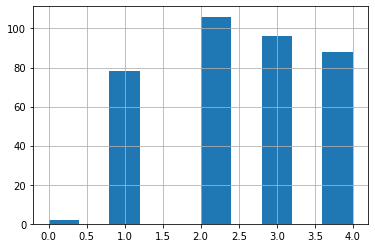

In [11]:
df_stud_math = df_stud_math.loc[df_stud_math[col_name] <= 5]
number_processing(col_name)

In [12]:
col_info(col_name)

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    370 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [13]:
# Данные столбца находятся в рамках от 0 до 4 по описанию данных столбца. 
# Имеются выбросы. Удаляем строки не удовлетворяющих описанию данных столбца.
# Основная часть данных больше 0, следовательно большинство отцов имеет как минимм 4 клаcса образования.

## Работа с 'traveltime'

count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

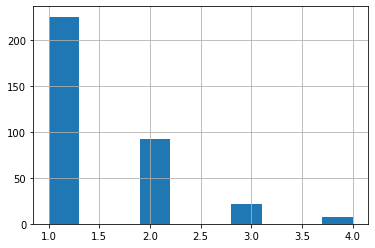

In [14]:
col_name = 'traveltime'
number_processing(col_name)

In [15]:
col_info(col_name)

,traveltime
1.0,225
2.0,92
3.0,21
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  345 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [16]:
# Данные столбца находятся в рамках от 1 до 4. 
# Малое количество учащихся имеют время в пути больше 60 минут.

## Работа с 'studytime'

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

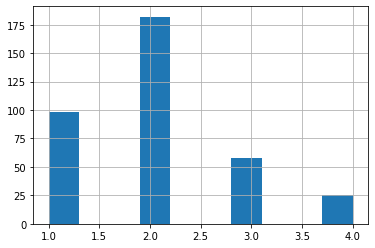

In [17]:
col_name = 'studytime'
number_processing(col_name)

In [18]:
col_info(col_name)

,studytime
2.0,182
1.0,98
3.0,58
4.0,25


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  363 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [19]:
# Данные столбца находятся в рамках от 1 до 4. 

## Работа с 'failures'

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

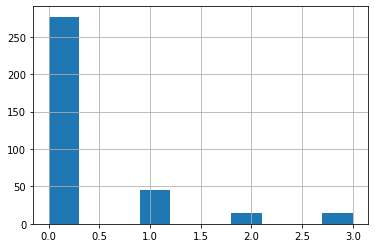

In [20]:
col_name = 'failures'
number_processing(col_name)

In [21]:
col_info(col_name)

,failures
0.0,277
1.0,45
3.0,15
2.0,14


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  351 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [22]:
# Данные столбца находятся в рамках от 0 до 3. 

## Работа с 'famrel'

count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

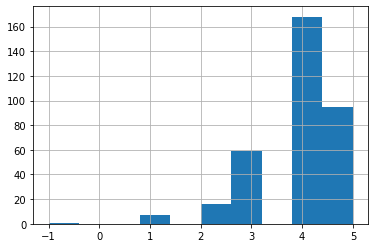

In [23]:
col_name = 'famrel'
number_processing(col_name)

count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

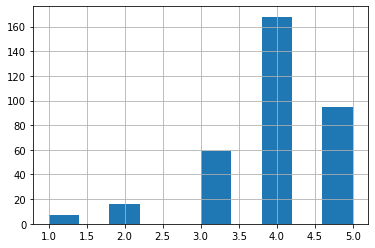

In [24]:
df_stud_math = df_stud_math.loc[df_stud_math[col_name] >= 0]
number_processing(col_name)

In [25]:
col_info(col_name)

,famrel
4.0,168
5.0,95
3.0,59
2.0,16
1.0,7


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  345 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB


In [26]:
# Данные столбца находятся в рамках от 1 до 5 по описанию данных столбца. 
# Имеются выбросы. Удаляем строки не удовлетворяющих описанию данных столбца.
# Малое количество учащихся имеют очень плохие семейные отношения.

## Работа с 'freetime'

count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

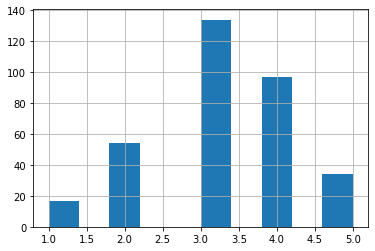

In [27]:
col_name = 'freetime'
number_processing(col_name)

In [28]:
col_info(col_name)

,freetime
3.0,134
4.0,97
2.0,54
5.0,34
1.0,17


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  336 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB


In [29]:
# Данные столбца находятся в рамках от 1 до 5. 

## Работа с 'goout'

count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

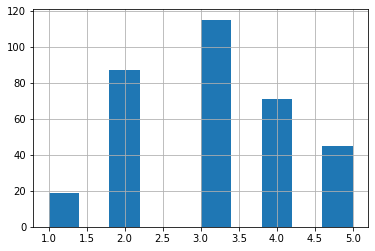

In [30]:
col_name = 'goout'
number_processing(col_name)

In [31]:
col_info(col_name)

,goout
3.0,115
2.0,87
4.0,71
5.0,45
1.0,19


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   337 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB


In [32]:
# Данные столбца находятся в рамках от 1 до 5. 

## Работа с 'health'

count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

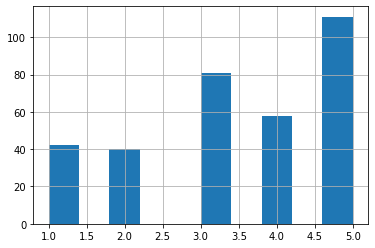

In [33]:
col_name = 'health'
number_processing(col_name)

In [34]:
col_info(col_name)

,health
5.0,111
3.0,81
4.0,58
1.0,42
2.0,40


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  332 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB


In [35]:
# Данные столбца находятся в рамках от 1 до 5. 

## Работа с 'absences'

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

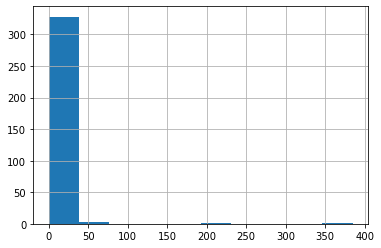

In [36]:
col_name = 'absences'
number_processing(col_name)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


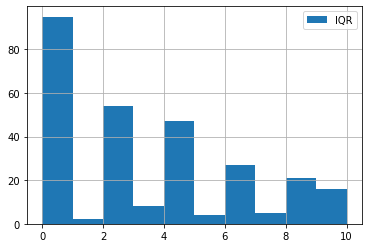

In [37]:
iqr_calculation(col_name)

In [38]:
df_stud_math = df_stud_math.loc[df_stud_math[col_name] <= 20]
# Основная часть данных находятся в рамках от 0 до 10.
# Имеются выбросы, фильтруем их при помощи формулы интерквартильного расстояния (межквартильного размаха).

## Работа с 'score'

count    313.000000
mean      52.124601
std       22.511546
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

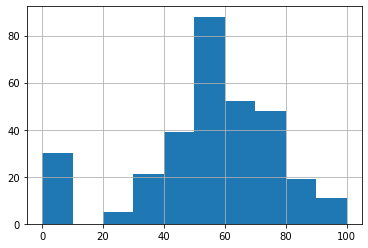

In [39]:
col_name = 'score'
number_processing(col_name)

In [40]:
# Все данне находится в пределах от 0 до 100. Выбросов не наблюдается.

# Обработка текстовых данных

In [41]:
df_stud_math.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              318 non-null    object 
 1   sex                 318 non-null    object 
 2   age                 318 non-null    int64  
 3   address             306 non-null    object 
 4   famsize             298 non-null    object 
 5   Pstatus             283 non-null    object 
 6   Medu                315 non-null    float64
 7   Fedu                318 non-null    float64
 8   Mjob                303 non-null    object 
 9   Fjob                291 non-null    object 
 10  reason              304 non-null    object 
 11  guardian            290 non-null    object 
 12  traveltime          295 non-null    float64
 13  studytime           313 non-null    float64
 14  failures            301 non-null    float64
 15  schoolsup           309 non-null    object 
 16  famsup  

## Работа с 'school' 

In [42]:
col_name = 'school'
string_processing(col_name)

GP    279
MS     39
Name: school, dtype: int64

In [43]:
# Пустых значений нет.

## Работа с 'sex' 

In [44]:
col_name = 'sex'
string_processing(col_name)

F    168
M    150
Name: sex, dtype: int64

In [45]:
# Пустых значений нет.

## Работа с 'address' 

In [46]:
col_name = 'address'
string_processing(col_name)

U      237
R       69
nan     12
Name: address, dtype: int64

In [47]:
# Есть пустые значения.

## Работа с 'famsize'

In [48]:
col_name = 'famsize'
string_processing(col_name)

GT3    212
LE3     86
nan     20
Name: famsize, dtype: int64

In [49]:
# Есть пустые значения.

##  Работа с 'Pstatus'

In [50]:
col_name = 'Pstatus'
string_processing(col_name)

T      257
nan     35
A       26
Name: Pstatus, dtype: int64

In [51]:
# Есть пустые значения.

## Работа с 'Mjob' 

In [52]:
col_name = 'Mjob'
string_processing(col_name)

other       109
services     73
at_home      50
teacher      42
health       29
nan          15
Name: Mjob, dtype: int64

In [53]:
# Есть пустые значения.

## Работа с 'Fjob' 

In [54]:
col_name = 'Fjob'
string_processing(col_name)

other       166
services     79
nan          27
teacher      22
at_home      14
health       10
Name: Fjob, dtype: int64

In [55]:
# Есть пустые значения.

## Работа с 'reason' 

In [56]:
col_name = 'reason'
string_processing(col_name)

course        108
reputation     84
home           82
other          30
nan            14
Name: reason, dtype: int64

In [57]:
# Есть пустые значения.

## Работа с 'guardian' 

In [58]:
col_name = 'guardian'
string_processing(col_name)

mother    200
father     69
nan        28
other      21
Name: guardian, dtype: int64

In [59]:
# Есть пустые значения.

## Работа с 'schoolsup' 

In [60]:
col_name = 'schoolsup'
string_processing(col_name)

no     269
yes     40
nan      9
Name: schoolsup, dtype: int64

In [61]:
# Есть пустые значения.

## Работа с 'famsup' 

In [62]:
col_name = 'famsup'
string_processing(col_name)

yes    172
no     115
nan     31
Name: famsup, dtype: int64

In [63]:
# Есть пустые значения.

## Работа с 'paid' 

In [64]:
col_name = 'paid'
string_processing(col_name)

no     164
yes    121
nan     33
Name: paid, dtype: int64

In [65]:
# Есть пустые значения.

## Работа с 'activities' 

In [66]:
col_name = 'activities'
string_processing(col_name)

yes    159
no     147
nan     12
Name: activities, dtype: int64

In [67]:
# Есть пустые значения.

## Работа с 'nursery' 

In [68]:
col_name = 'nursery'
string_processing(col_name)

yes    238
no      64
nan     16
Name: nursery, dtype: int64

In [69]:
# Есть пустые значения.

## Работа с 'higher' 

In [70]:
col_name = 'higher'
string_processing(col_name)

yes    288
nan     15
no      15
Name: higher, dtype: int64

In [71]:
# Есть пустые значения.

## Работа с 'internet' 

In [72]:
col_name = 'internet'
string_processing(col_name)

yes    240
no      49
nan     29
Name: internet, dtype: int64

In [73]:
# Есть пустые значения.

## Работа с 'romantic' 

In [74]:
col_name = 'romantic'
string_processing(col_name)

no     198
yes     94
nan     26
Name: romantic, dtype: int64

In [75]:
# Есть пустые значения.

# Корреляционный анализ

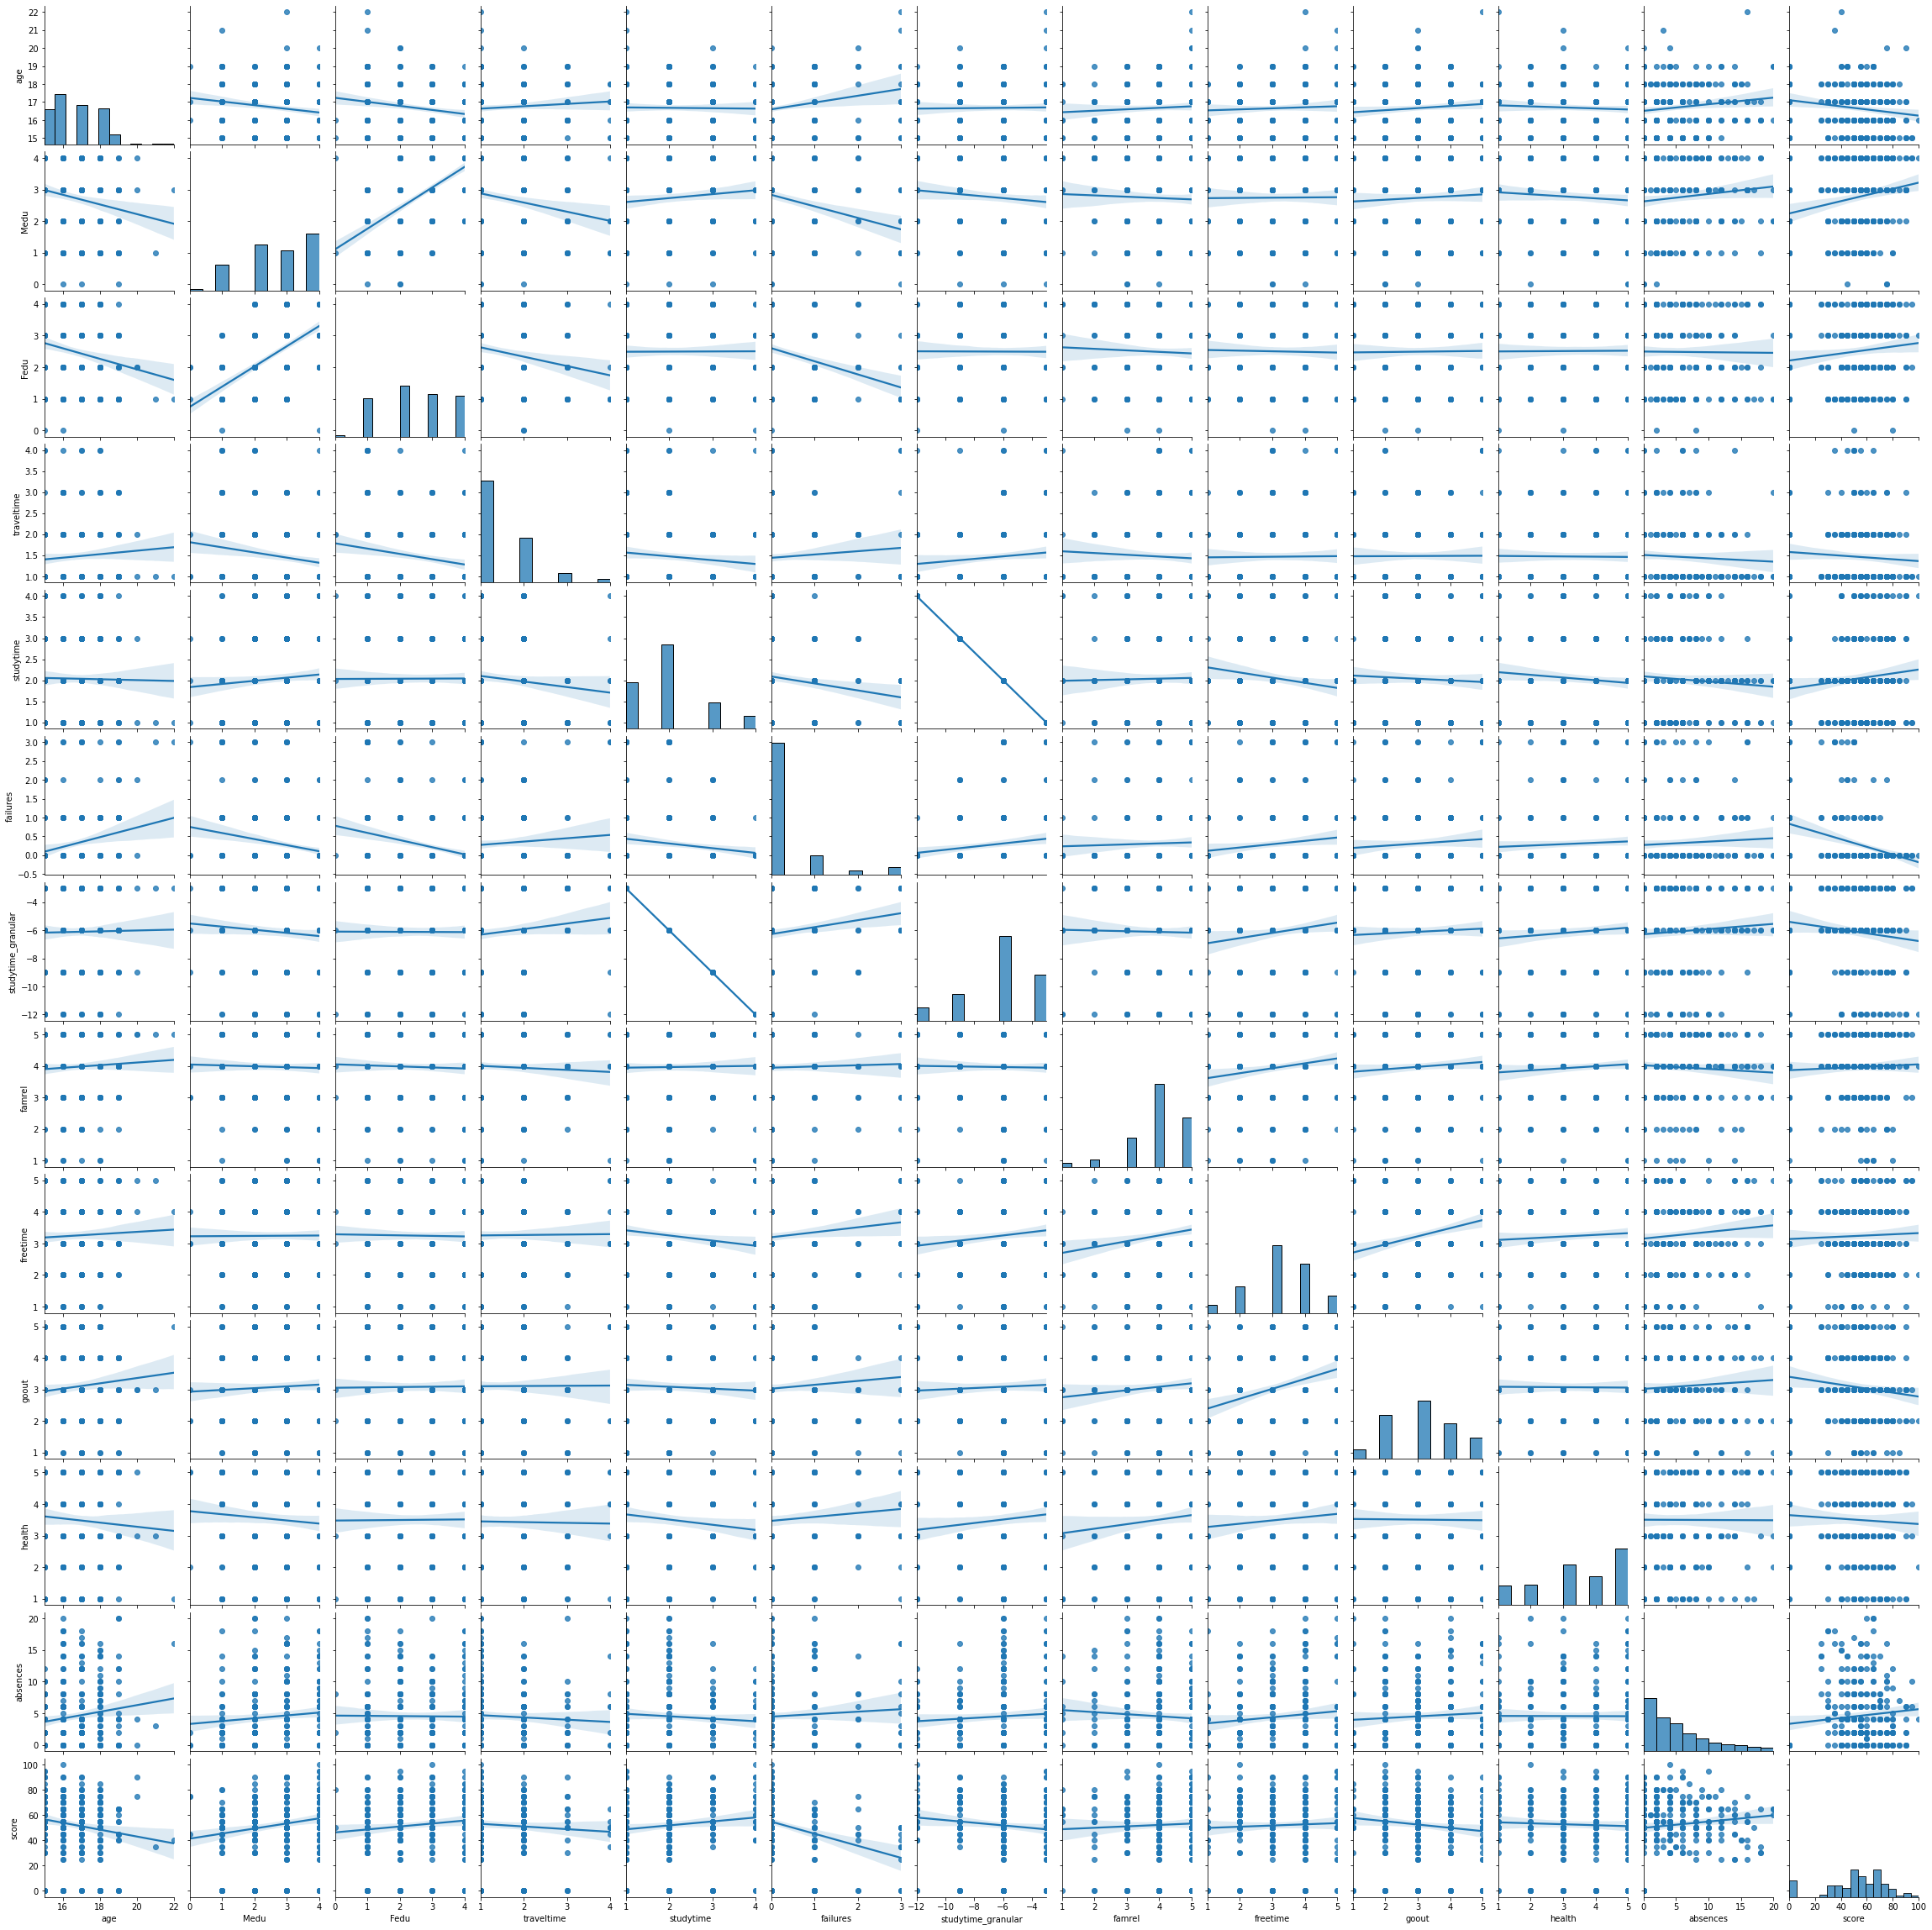

In [76]:
sns.pairplot(df_stud_math, kind = 'reg')

In [77]:
df_stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.176250,-0.193469,0.073914,-0.015188,0.219710,0.015188,0.058482,0.045144,0.097906,-0.061147,0.138921,-0.152937
Medu,-0.176250,1.000000,0.647425,-0.188525,0.096564,-0.242613,-0.096564,-0.034579,0.006825,0.056204,-0.079287,0.102861,0.198240
Fedu,-0.193469,0.647425,1.000000,-0.193201,0.003729,-0.281114,-0.003729,-0.040042,-0.018485,0.011471,0.007139,-0.009144,0.114211
traveltime,0.073914,-0.188525,-0.193201,1.000000,-0.109333,0.083311,0.109333,-0.051752,0.009835,0.004574,-0.011856,-0.053176,-0.067642
studytime,-0.015188,0.096564,0.003729,-0.109333,1.000000,-0.143829,-1.000000,0.018273,-0.141048,-0.048134,-0.102211,-0.069378,0.119395
failures,0.219710,-0.242613,-0.281114,0.083311,-0.143829,1.000000,0.143829,0.031704,0.117818,0.084852,0.067415,0.059202,-0.311995
studytime_granular,0.015188,-0.096564,-0.003729,0.109333,-1.000000,0.143829,1.000000,-0.018273,0.141048,0.048134,0.102211,0.069378,-0.119395
famrel,0.058482,-0.034579,-0.040042,-0.051752,0.018273,0.031704,-0.018273,1.000000,0.169739,0.092249,0.096186,-0.061762,0.045598
freetime,0.045144,0.006825,-0.018485,0.009835,-0.141048,0.117818,0.141048,0.169739,1.000000,0.283708,0.074485,0.100271,0.042375
goout,0.097906,0.056204,0.011471,0.004574,-0.048134,0.084852,0.048134,0.092249,0.283708,1.000000,-0.008117,0.061950,-0.127803


In [78]:
# Так как переменные studytime_granular и studytime скоррелированы полностью, одну переменную можно исключить. 
# Пусть это будет переменная studytime_granular.
# На основании оставшихся столбов можно предположить:
# 1. Образование родителей может положительно влеять на итоговую оценку.
# 2. Количество уделяемового времяни учебе способствует лушему результату.
# 3. Количество проведение времени с друзьями может отрицательно влеять на итоговую оценку.
# * Из-за малого количества данных об учащихся старше 19 лет, может присутствовать ложная отрицательная корреляция.
# * Интересен факт наличия положительной корреляции между количеством пропущенных занятий и баллами по госэкзамену по математике

# Анализ номинативных переменных

In [37]:
display(df_stud_math.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,nan,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,nan,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,nan,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,nan,no,yes,-6.0,yes,yes,nan,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,nan,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,nan,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
9,GP,M,15,U,nan,nan,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
